<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/module1-OLS-regression/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import numpy as np

df_train, df_test = train_test_split(df, test_size=0.5)
models = []
Y_col = "price"

for c in df:
  if df[c].dtype in ["float64", "int64"] and c not in ["id", "date", Y_col]:
    model = LinearRegression()
    model.fit(df_train[c].values.reshape(-1, 1), df_train[Y_col].values.reshape(-1, 1))
    Y_test_pred = model.predict(df_test[c].values.reshape(-1, 1))
    R2 = r2_score(df_test[Y_col].values.reshape(-1, 1), Y_test_pred)
    RMSE = np.sqrt(mean_squared_error(df_test[Y_col].values.reshape(-1, 1), Y_test_pred))
    print("Model: dep({}); ind({})".format(Y_col, c))
    print("\tIntercept:   {: 16.4f}".format(float(model.intercept_)))
    print("\tCoefficient: {: 16.4f}".format(float(model.coef_[0])))
    print("\tR^2:         {: 16.4f}".format(R2))
    print("\tRMSE:        {: 16.4f}".format(RMSE))
    print()
    models.append((R2, RMSE, c, model))

Model: dep(price); ind(bedrooms)
	Intercept:        151730.5407
	Coefficient:      114748.5205
	R^2:                   0.0995
	RMSE:             351024.0107

Model: dep(price); ind(bathrooms)
	Intercept:         19364.7354
	Coefficient:      245658.9340
	R^2:                   0.2817
	RMSE:             313488.8298

Model: dep(price); ind(sqft_living)
	Intercept:        -43421.7958
	Coefficient:         280.3728
	R^2:                   0.4964
	RMSE:             262498.1802

Model: dep(price); ind(sqft_lot)
	Intercept:        528427.9746
	Coefficient:           0.7947
	R^2:                   0.0089
	RMSE:             368246.5862

Model: dep(price); ind(floors)
	Intercept:        285768.8452
	Coefficient:      169960.3342
	R^2:                   0.0679
	RMSE:             357122.1570

Model: dep(price); ind(waterfront)
	Intercept:        532440.9812
	Coefficient:     1041429.5438
	R^2:                   0.0807
	RMSE:             354666.8327

Model: dep(price); ind(view)
	Intercept:        

In [10]:
def sortR2(val): 
    return val[0]
def sortRMSE(val): 
    return val[1]
models.sort(key=sortRMSE, reverse=True)
m = models[-1]
model = m[-1]
print("Model(Best RMSE): dep({}); ind({})".format(Y_col, m[2]))
print("\tIntercept:   {: 16.4f}".format(float(model.intercept_)))
print("\tCoefficient: {: 16.4f}".format(float(model.coef_[0])))
print("\tR^2:         {: 16.4f}".format(m[0]))
print("\tRMSE:        {: 16.4f}".format(m[1]))
print()
models.sort(key=sortR2)
m = models[-1]
model = m[-1]
print("Model (Best R^2): dep({}); ind({})".format(Y_col, m[2]))
print("\tIntercept:   {: 16.4f}".format(float(model.intercept_)))
print("\tCoefficient: {: 16.4f}".format(float(model.coef_[0])))
print("\tR^2:         {: 16.4f}".format(m[0]))
print("\tRMSE:        {: 16.4f}".format(m[1]))

Model(Best RMSE): dep(price); ind(sqft_living)
	Intercept:        -43421.7958
	Coefficient:         280.3728
	R^2:                   0.4964
	RMSE:             262498.1802

Model (Best R^2): dep(price); ind(sqft_living)
	Intercept:        -43421.7958
	Coefficient:         280.3728
	R^2:                   0.4964
	RMSE:             262498.1802


[-147860.66824879  -64464.06140871   18932.54543138  102329.15227147
  185725.75911156  269122.36595165  352518.97279174  435915.57963183
  519312.18647191  602708.793312    686105.40015209  769502.00699218
  852898.61383227  936295.22067236 1019691.82751245 1103088.43435253
 1186485.04119262 1269881.64803271 1353278.2548728  1436674.86171289
 1520071.46855298 1603468.07539307 1686864.68223315 1770261.28907324
 1853657.89591333 1937054.50275342 2020451.10959351 2103847.7164336
 2187244.32327369 2270640.93011377 2354037.53695386 2437434.14379395
 2520830.75063404 2604227.35747413 2687623.96431422 2771020.57115431
 2854417.17799439 2937813.78483448 3021210.39167457 3104606.99851466
 3188003.60535475 3271400.21219484 3354796.81903493 3438193.42587501
 3521590.0327151  3604986.63955519 3688383.24639528 3771779.85323537
 3855176.46007546 3938573.06691555]


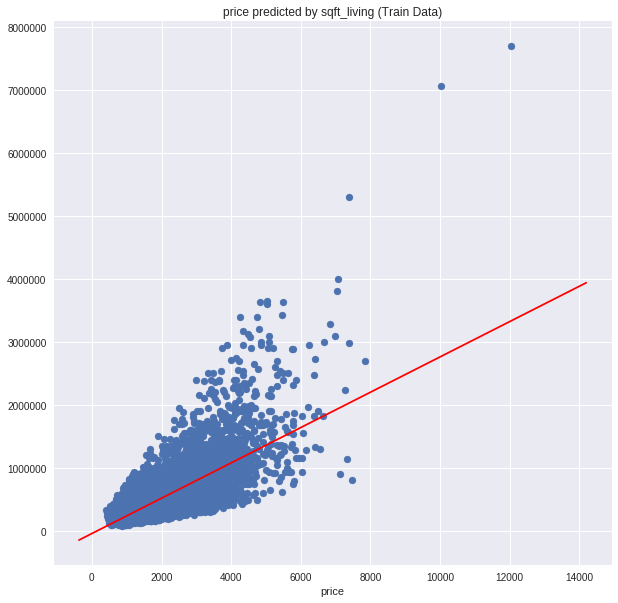

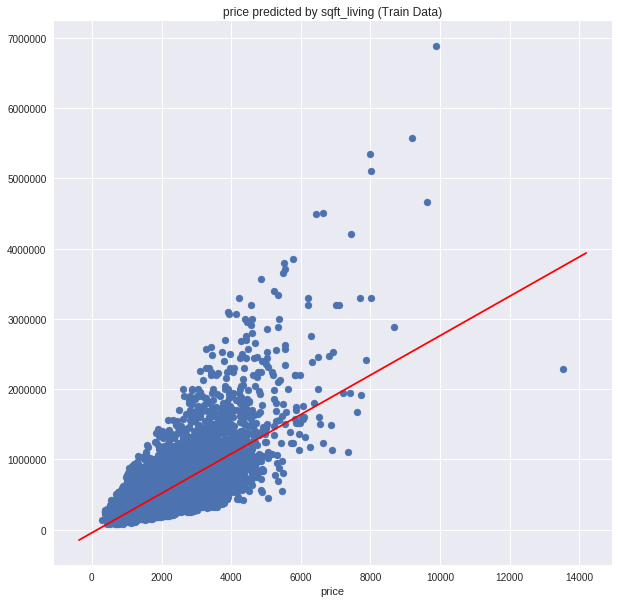

In [13]:
import matplotlib.pyplot as plt

X = df[m[2]].values
X_dif = X.max() - X.min()
X_min = X.min() - 0.05 * X_dif
X_max = X.max() + 0.05 * X_dif
X_p = np.linspace(X_min, X_max)
Y_p = model.intercept_ + model.coef_[0] * X_p

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.scatter(df_train[m[2]].values, df_train[Y_col].values)
ax.plot(X_p, Y_p, color='red')
ax.set_xlabel(m[2])
ax.set_ylabel(Y_col)
ax.set_title("{} predicted by {} (Train Data)".format(Y_col, m[2]))

fig2 = plt.figure(figsize=(10,10))
bx = fig2.add_subplot(111)
bx.scatter(df_test[m[2]].values, df_test[Y_col].values)
bx.plot(X_p, Y_p, color='red')
bx.set_xlabel(m[2])
bx.set_ylabel(Y_col)
bx.set_title("{} predicted by {} (Test Data)".format(Y_col, m[2]))

plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [20]:
models2 = []
X_init_train = df_train[m[2]].values
X_init_test = df_test[m[2]].values
Y_train = df_train[Y_col].values.reshape(-1, 1)
Y_test = df_test[Y_col].values.reshape(-1, 1)
l_train = X_init_train.shape[0]
l_test = X_init_test.shape[0]
for c in df:
  if df[c].dtype in ["float64", "int64"] and c not in ["id", "date", Y_col, m[2]]:
    X_train = np.zeros((l_train,2))
    X_test = np.zeros((l_test,2))
    X_train[:,0] = X_init_train
    X_test[:,0] = X_init_test
    X_train[:,1] = df_train[c].values
    X_test[:,1] = df_test[c].values
    model = LinearRegression()
    model.fit(X_train, Y_train)
    Y_test_pred = model.predict(X_test)
    R2 = r2_score(Y_test, Y_test_pred)
    RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
    print("Model: dep({}); ind({}, {})".format(Y_col, m[2], c))
    print("\tIntercept:    {: 16.4f}".format(float(model.intercept_)))
    print("\tCoefficient0: {: 16.4f}".format(float(model.coef_[0][0])))
    print("\tCoefficient1: {: 16.4f}".format(float(model.coef_[0][1])))
    print("\tR^2:          {: 16.4f}".format(R2))
    print("\tRMSE:         {: 16.4f}".format(RMSE))
    print()
    models2.append((R2, RMSE, c, model))

Model: dep(price); ind(sqft_living, bedrooms)
	Intercept:          68511.0173
	Coefficient0:         310.8158
	Coefficient1:      -51786.9350
	R^2:                    0.5115
	RMSE:              258538.0772

Model: dep(price); ind(sqft_living, bathrooms)
	Intercept:         -39227.0663
	Coefficient0:         283.7011
	Coefficient1:       -5246.4860
	R^2:                    0.4964
	RMSE:              262485.8047

Model: dep(price); ind(sqft_living, sqft_lot)
	Intercept:         -43645.8900
	Coefficient0:         283.0139
	Coefficient1:          -0.3574
	R^2:                    0.4970
	RMSE:              262351.3752

Model: dep(price); ind(sqft_living, floors)
	Intercept:         -48129.7243
	Coefficient0:         279.4376
	Coefficient1:        4446.0421
	R^2:                    0.4965
	RMSE:              262471.2993

Model: dep(price); ind(sqft_living, waterfront)
	Intercept:         -35174.1940
	Coefficient0:         273.6548
	Coefficient1:      774695.0493
	R^2:                    0.53

In [22]:
models2.sort(key=sortRMSE, reverse=True)
m1 = models2[-1]
model = m1[-1]
print("Model(Best RMSE): dep({}); ind({}, {})".format(Y_col, m[2], m1[2]))
print("\tIntercept:    {: 16.4f}".format(float(model.intercept_)))
print("\tCoefficient0: {: 16.4f}".format(float(model.coef_[0][0])))
print("\tCoefficient1: {: 16.4f}".format(float(model.coef_[0][1])))
print("\tR^2:          {: 16.4f}".format(m1[0]))
print("\tRMSE:         {: 16.4f}".format(m1[1]))
print()
models2.sort(key=sortR2)
m1 = models2[-1]
model = m1[-1]
print("Model(Best RMSE): dep({}); ind({}, {})".format(Y_col, m[2], m1[2]))
print("\tIntercept:    {: 16.4f}".format(float(model.intercept_)))
print("\tCoefficient0: {: 16.4f}".format(float(model.coef_[0][0])))
print("\tCoefficient1: {: 16.4f}".format(float(model.coef_[0][1])))
print("\tR^2:          {: 16.4f}".format(m1[0]))
print("\tRMSE:         {: 16.4f}".format(m1[1]))

Model(Best RMSE): dep(price); ind(sqft_living, lat)
	Intercept:      -33883147.4899
	Coefficient0:         273.9797
	Coefficient1:      711787.5046
	R^2:                    0.5695
	RMSE:              242706.5967

Model(Best RMSE): dep(price); ind(sqft_living, lat)
	Intercept:      -33883147.4899
	Coefficient0:         273.9797
	Coefficient1:      711787.5046
	R^2:                    0.5695
	RMSE:              242706.5967


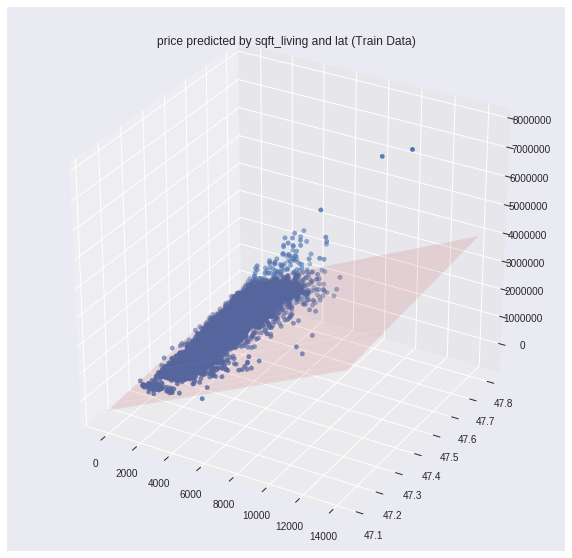

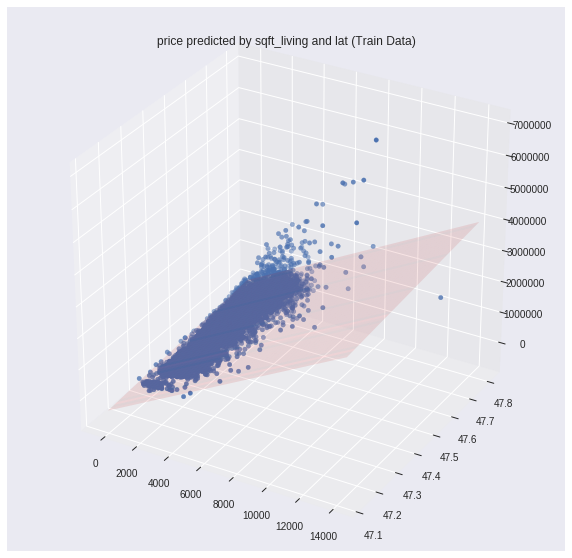

In [40]:
from mpl_toolkits.mplot3d import Axes3D

X0 = df[m[2]].values
X0_dif = X0.max() - X0.min()
X0_min = X0.min() - 0.05 * X0_dif
X0_max = X0.max() + 0.05 * X0_dif

X1 = df[m1[2]].values
X1_dif = X1.max() - X1.min()
X1_min = X1.min() - 0.05 * X1_dif
X1_max = X1.max() + 0.05 * X1_dif

X_p = np.meshgrid(np.linspace(X0_min, X0_max), np.linspace(X1_min, X1_max))
Y_p = model.intercept_ + model.coef_[0][0] * X_p[0] + model.coef_[0][1] * X_p[1]

fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(df_train[m[2]].values, df_train[m1[2]].values, df_train[Y_col].values)
ax.plot_surface(X_p[0], X_p[1], Y_p, color='red', alpha=0.1)
ax.set_title("{} predicted by {} and {} (Train Data)".format(Y_col, m[2], m1[2]))

fig2 = plt.figure(figsize=(10,10))
bx = fig2.add_subplot(111, projection='3d')
bx.scatter(df_test[m[2]].values, df_test[m1[2]].values, df_test[Y_col].values)
bx.plot_surface(X_p[0], X_p[1], Y_p, color='red', alpha=0.1)
bx.set_title("{} predicted by {} and {} (Train Data)".format(Y_col, m[2], m1[2]))

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [53]:
X_train = np.zeros(1)
X_test = np.zeros(1)

Y_train = df_train[Y_col].values.reshape(-1,1)
Y_test = df_test[Y_col].values.reshape(-1,1)

col_list = []

for c in df:
  if df[c].dtype in ["float64", "int64"] and c not in ["id", "date", Y_col]:
    if X_train.shape == (1,):
      X_train = df_train[c].values.reshape(-1,1)
      X_test = df_test[c].values.reshape(-1,1)
    else:
      X_train = np.append(X_train, df_train[c].values.reshape(-1,1), axis=1)
      X_test = np.append(X_test, df_test[c].values.reshape(-1,1), axis=1)
    col_list.append(c)

model = LinearRegression()
model.fit(X_train, Y_train)
Y_test_pred = model.predict(X_test)
R2 = r2_score(Y_test, Y_test_pred)
RMSE = np.sqrt(mean_squared_error(Y_test, Y_test_pred))
print("Model: dep({}); ind({}, {})".format(Y_col, m[2], c))
print("\t{:30}{: 16.4f}".format("R^2: ", R2))
print("\t{:30}{: 16.4f}".format("RMSE: ", RMSE))
print("\t{:30}{: 16.4f}".format("Intercept: ", float(model.intercept_)))
for i in range(len(model.coef_[0])):
  print("\t{:30}{: 16.4f}".format("Coefficient({}): ".format(col_list[i]), float(model.coef_[0][i])))

Model: dep(price); ind(sqft_living, sqft_lot15)
	R^2:                                    0.7018
	RMSE:                              201990.4751
	Intercept:                        6453463.3066
	Coefficient(bedrooms):             -32897.5835
	Coefficient(bathrooms):             39884.3182
	Coefficient(sqft_living):             105.5707
	Coefficient(sqft_lot):                  0.2056
	Coefficient(floors):                 8090.9148
	Coefficient(waterfront):           540098.8247
	Coefficient(view):                  52730.6691
	Coefficient(condition):             24060.7611
	Coefficient(grade):                 95873.8445
	Coefficient(sqft_above):               67.1280
	Coefficient(sqft_basement):            38.4427
	Coefficient(yr_built):              -2664.4861
	Coefficient(yr_renovated):             27.9923
	Coefficient(zipcode):                -556.4720
	Coefficient(lat):                  594778.6284
	Coefficient(long):                -199598.4330
	Coefficient(sqft_living15):            

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- Write a blog post explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
